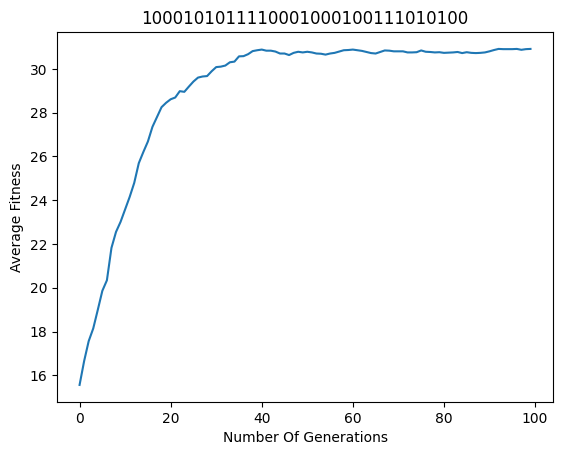

In [59]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

Targets = "1000101011110001000100111010100"

SizeOfPopulation = 100
RateOfMutation = 0.001
RateOfCrossover = 0.8
EliteNumber = 10
Generations = 100

population = []
for i in range(SizeOfPopulation):
    string = ""
    for j in range(len(Targets)):
        string += random.choice(["0", "1"])
    population.append(string)

def fitness(string):
    score = 0
    for i in range(len(Targets)):
        if string[i] == Targets[i]:
            score += 1
    return score
    
FitnessRecord = []
for generation in range(Generations):
    FitnessScores = [fitness(string) for string in population]
    AverageFitness = np.mean(FitnessScores)
    FitnessRecord.append(AverageFitness)
    
    elite_indices = np.argsort(FitnessScores)[-EliteNumber:]
    Elite = [population[i] for i in elite_indices]
    
    
    Children = Elite.copy()
    while len(Children) < SizeOfPopulation:
        
        ParentA, ParentB = random.choices(population, k=2, weights=FitnessScores)
        if random.random() < RateOfCrossover:
            point = random.randint(1, len(Targets) - 1)
            ChildA = ParentA[:point] + ParentB[point:]
            ChildB = ParentB[:point] + ParentA[point:]
        else:
            ChildA, ChildB = ParentA, ParentB
            
      
        ChildA = "".join([bit if random.random() > RateOfMutation else "1" if bit == "0" else "0" for bit in ChildA])
        ChildB = "".join([bit if random.random() > RateOfMutation else "1" if bit == "0" else "0" for bit in ChildB])
        
        
        Children.append(ChildA)
        if len(Children) < SizeOfPopulation:
            Children.append(ChildB)
    
    population = Children


plt.plot(FitnessRecord)
plt.xlabel("Number Of Generations")
plt.ylabel("Average Fitness")
plt.title(Targets)
plt.show()

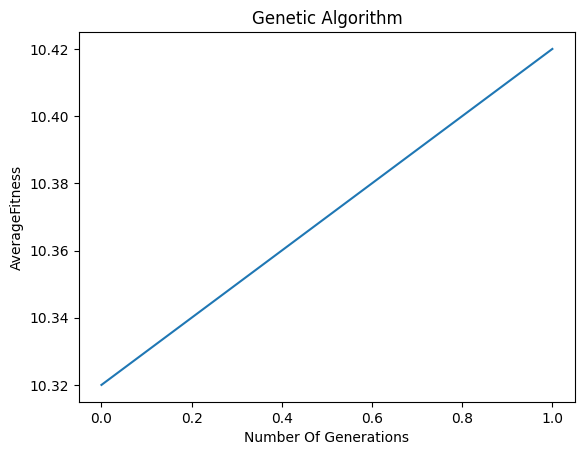

In [60]:
import random



def FitnessX2(solution):
    num_ones = sum(solution)
    if num_ones == 0:
        return 2 * len(solution)
    else:
        return num_ones

def GA(SizeOfPopulation, num_generations):
    population = [[random.randint(0, 1) for _ in range(20)] for _ in range(SizeOfPopulation)]
    FitnessVals = [FitnessX2(solution) for solution in population]
    AverageFitness = [sum(FitnessVals)/SizeOfPopulation]
    
    
    for i in range(num_generations):
        
        Children_population = []
        for j in range(SizeOfPopulation):
            
            ParentA = population[random.randint(0, SizeOfPopulation-1)]
            ParentB = population[random.randint(0, SizeOfPopulation-1)]
        
            Children = []
            for k in range(len(ParentA)):
                if random.random() < 0.5:
                    Children.append(ParentA[k])
                else:
                    Children.append(ParentB[k])
          
            for k in range(len(Children)):
                if random.random() < 0.1:
                    Children[k] = 1 - Children[k]
            Children_population.append(Children)
        
        
    FitnessVals = [FitnessX2(solution) for solution in Children_population]
    AverageFitness.append(sum(FitnessVals)/SizeOfPopulation)
        
    population = []
    for j in range(SizeOfPopulation):
        tournament = [random.randint(0, SizeOfPopulation-1) for _ in range(3)]
        tournament_FitnessVals = [FitnessVals[k] for k in tournament]
        population.append(Children_population[tournament[tournament_FitnessVals.index(max(tournament_FitnessVals))]])    
    return AverageFitness

AverageFitness = GA(50, 100)

plt.title('Genetic Algorithm')
plt.xlabel('Number Of Generations')
plt.ylabel('AverageFitness')
plt.plot(AverageFitness)
plt.show()